[word_embedding_short](https://www.youtube.com/shorts/FJtFZwbvkI4)

In [1]:
! pip install gensim

  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/2a/15/aca2fc3b9e97bd0e28be4a4302793c43757b04b828223c6d103c72132f19/gensim-4.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for numpy<2.0,>=1.18.5 from https://files.pythonhosted.org/packages/1a/2e/151484f49fd03944c4a3ad9c418ed193cfd02724e138ac8a9505d056c582/numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
  Obtaining dependency information for scipy<1.14.0,>=1.7.0 from https://files.pythonhosted.org/packages/ba/92/42476de1af309c27710004f5cdebc27bec62c204db42e05b23a302cb0c9a/scipy-1.13.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
  Obtaining dependency information for smart-open>=1.8.1 from https://files.pythonhosted.org/packages/65/12/cc24847b4b0b124501a33cd8f7963f79f6f6584bc7f2f4fc16bbbaa54c8f/sma

In [2]:
import gensim.downloader as api

# Load pre-trained Word2Vec model (Google News)
model = api.load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
[('king', 0.8449392318725586)]


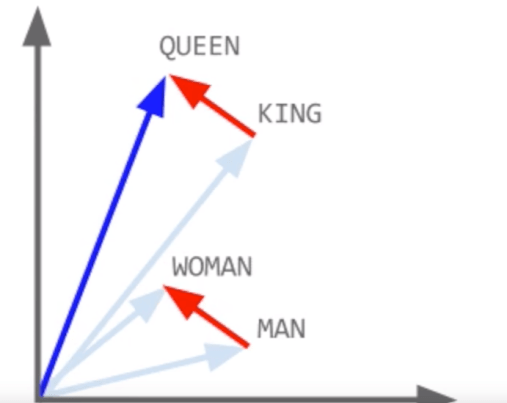

In [79]:
# Perform the vector arithmetic: king - man + woman
result_vector = model['king'] - model['male'] + model['female']

# Find the most similar word to the resulting vector
similar_words = model.most_similar([result_vector], topn=5)

# Output the most similar word (should be 'queen')
print(similar_words)

[('king', 0.8830681443214417), ('queen', 0.6669612526893616), ('kings', 0.6140398979187012), ('monarch', 0.5949661135673523), ('crown_prince', 0.5778266787528992)]


In [6]:
# Perform the vector arithmetic: king - man + woman
result_vector = model['London'] - model['England'] + model['France']

# Find the most similar word to the resulting vector
similar_words = model.most_similar([result_vector], topn=1)

# Output the most similar word (should be 'queen')
print(similar_words)

[('Paris', 0.7244439721107483)]


In [21]:
# Perform the vector arithmetic: king - man + woman
result_vector = model['man'] - model['teenager']

# Find the most similar word to the resulting vector
similar_words = model.most_similar([result_vector], topn=1)

# Output the most similar word (should be 'queen')
print(similar_words)

[('gentlemen', 0.28533631563186646)]


In [40]:
# Perform the vector arithmetic: king - man + woman
result_vector = model['chef'] - model['cooking'] - model['man'] - model['food']

# Find the most similar word to the resulting vector
similar_words = model.most_similar([result_vector], topn=3)

# Output the most similar word (should be 'queen')
print(similar_words)

[('----------_-----------------------------------------------_GS##', 0.32696017622947693), ('Globalization_KEY_FACTORS', 0.31709057092666626), ('K.Kahne_###-###', 0.31330186128616333)]


In [41]:
# Perform the vector arithmetic: king - man + woman
result_vector = model['cooking'] + model['man'] + model['food']

# Find the most similar word to the resulting vector
similar_words = model.most_similar([result_vector], topn=3)

# Output the most similar word (should be 'queen')
print(similar_words)

[('cooking', 0.7916235327720642), ('food', 0.766420304775238), ('cook', 0.6633827090263367)]


In [76]:
def manhattan_distance(str1, str2):
    # Ensure both strings are of the same length by padding the shorter one with spaces
    max_len = max(len(str1), len(str2))
    str1 = str1.ljust(max_len)
    str2 = str2.ljust(max_len)
    
    # Calculate the Manhattan distance
    distance = sum(abs(ord(c1) - ord(c2)) for c1, c2 in zip(str1, str2))
    
    return distance




# returning the most similar word that is not in the list
def get_most_similar_word(words, model):
    result_vector = .0
    for word in words:
        result_vector += model[word]

    similar_words = model.most_similar([result_vector], topn=20)

    for candidate_word, _ in similar_words:
        min_distance = 12
        for word in words:
            dist = levenshtein_distance(candidate_word, word)
            if dist < min_distance:
                min_distance = dist
        if min_distance > 3:
            return candidate_word
    return None

In [78]:
get_most_similar_word(['cooking', 'man', 'food', 'restaurant'], model)

'eatery'

In [48]:
get_most_similar_word(['wolf', 'domestication'], model)

'domesticated'

In [59]:
get_most_similar_word(['greek', 'food'], model)

'greeks'

In [66]:
def levenshtein_distance(str1, str2):
    len_str1 = len(str1) + 1
    len_str2 = len(str2) + 1

    # Create a matrix to store distances
    matrix = [[0 for n in range(len_str2)] for m in range(len_str1)]
    
    # Initialize the matrix
    for i in range(len_str1):
        matrix[i][0] = i
    for j in range(len_str2):
        matrix[0][j] = j

    # Compute the Levenshtein distance
    for i in range(1, len_str1):
        for j in range(1, len_str2):
            if str1[i-1] == str2[j-1]:
                cost = 0
            else:
                cost = 1
            matrix[i][j] = min(matrix[i-1][j] + 1,      # Deletion
                               matrix[i][j-1] + 1,      # Insertion
                               matrix[i-1][j-1] + cost) # Substitution

    return matrix[-1][-1]

# Example usage
str1 = "kitten"
str2 = "sitting"
distance = levenshtein_distance(str1, str2)
print(f"The Levenshtein distance between '{str1}' and '{str2}' is {distance}.")

The Levenshtein distance between 'kitten' and 'sitting' is 3.
